# Overview of the BindingDB dataset

The aim of this section is to inspect and analyse the bindingDB dataset on a general level. This overview of the dataset ensures the remainder of the analyses rely on solid, foundational knowledge of the availability and distribution of the given data. In addition, this highlights biases that may arise from the data itself. Thus we propose to inspect the data by categories that will be analysed in depth in subsequent section. In particular, this section offers an overview of Binding Kinetics, data related to targets and ligands (IDs, names, sequences, etc.), and metadata (publications, institutions, patents, etc.)

##### Loading Data and Defining Categories

We load here the necessary data, focusing on the main dataset, and divide this data into several categories

In [2]:
# IMPORTS
# base
import pandas as pd
import numpy as np
import itertools
from itertools import combinations

# cleaning
from src.utils.utils import group_categories
from src.utils.utils import count_classified_rows

# plots
import seaborn as sns
from matplotlib import pyplot as plt
#from src.scripts.data_description import (plot_availability, plot_distributions, plot_overlaps, categorical_countplot,)

In [2]:
usecols = [
    "BindingDB Reactant_set_id",
    "Ligand SMILES",
    "Ligand InChI",
    "Ligand InChI Key",
    "BindingDB MonomerID",
    "BindingDB Ligand Name",
    "Target Name",
    "Target Source Organism According to Curator or DataSource",
    "Ki (nM)",
    "IC50 (nM)",
    "Kd (nM)",
    "EC50 (nM)",
    "kon (M-1-s-1)",
    "koff (s-1)",
    "pH",
    "Temp (C)",
    "Curation/DataSource",
    "Article DOI",
    "BindingDB Entry DOI",
    "PMID",
    "PubChem AID",
    "Patent Number",
    "Authors",
    "Institution",
    # 'Link to Ligand in BindingDB', #removed because is nearly always error 404
    # 'Link to Target in BindingDB', #removed because is nearly always error 404
    # 'Link to Ligand-Target Pair in BindingDB', #removed because is nearly always error 404
    "Ligand HET ID in PDB",
    "PDB ID(s) for Ligand-Target Complex",
    "PubChem CID",
    "PubChem SID",
    "ChEBI ID of Ligand",
    "ChEMBL ID of Ligand",
    "DrugBank ID of Ligand",
    "IUPHAR_GRAC ID of Ligand",
    "KEGG ID of Ligand",
    "ZINC ID of Ligand",
    "Number of Protein Chains in Target (>1 implies a multichain complex)",
    "BindingDB Target Chain Sequence",
    "PDB ID(s) of Target Chain",
    "UniProt (SwissProt) Recommended Name of Target Chain",
    "UniProt (SwissProt) Entry Name of Target Chain",
    "UniProt (SwissProt) Primary ID of Target Chain",
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain',
    # 'UniProt (TrEMBL) Entry Name of Target Chain',
    "UniProt (TrEMBL) Primary ID of Target Chain",
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain',
    # 'BindingDB Target Chain Sequence.1',
    # 'PDB ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.1',
    # 'UniProt (SwissProt) Entry Name of Target Chain.1',
    # 'UniProt (SwissProt) Primary ID of Target Chain.1',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.1',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.1',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.1',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.1',
    # 'BindingDB Target Chain Sequence.2',
    # 'PDB ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.2',
    # 'UniProt (SwissProt) Entry Name of Target Chain.2',
    # 'UniProt (SwissProt) Primary ID of Target Chain.2',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.2',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.2',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.2',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.2',
    # 'BindingDB Target Chain Sequence.3',
    # 'PDB ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.3',
    # 'UniProt (SwissProt) Entry Name of Target Chain.3',
    # 'UniProt (SwissProt) Primary ID of Target Chain.3',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.3',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.3',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.3',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.3',
    # 'BindingDB Target Chain Sequence.4',
    # 'PDB ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.4',
    # 'UniProt (SwissProt) Entry Name of Target Chain.4',
    # 'UniProt (SwissProt) Primary ID of Target Chain.4',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.4',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.4',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.4',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.4',
    # 'BindingDB Target Chain Sequence.5',
    # 'PDB ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.5',
    # 'UniProt (SwissProt) Entry Name of Target Chain.5',
    # 'UniProt (SwissProt) Primary ID of Target Chain.5',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.5',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.5',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.5',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.5',
    # 'BindingDB Target Chain Sequence.6',
    # 'PDB ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.6',
    # 'UniProt (SwissProt) Entry Name of Target Chain.6',
    # 'UniProt (SwissProt) Primary ID of Target Chain.6',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.6',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.6',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.6',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.6',
    # 'BindingDB Target Chain Sequence.7',
    # 'PDB ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.7',
    # 'UniProt (SwissProt) Entry Name of Target Chain.7',
    # 'UniProt (SwissProt) Primary ID of Target Chain.7',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.7',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.7',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.7',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.7',
    # 'BindingDB Target Chain Sequence.8',
    # 'PDB ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.8',
    # 'UniProt (SwissProt) Entry Name of Target Chain.8',
    # 'UniProt (SwissProt) Primary ID of Target Chain.8',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.8',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.8',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.8',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.8',
    # 'BindingDB Target Chain Sequence.9',
    # 'PDB ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.9',
    # 'UniProt (SwissProt) Entry Name of Target Chain.9',
    # 'UniProt (SwissProt) Primary ID of Target Chain.9',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.9',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.9',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.9',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.9',
    # 'BindingDB Target Chain Sequence.10',
    # 'PDB ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.10',
    # 'UniProt (SwissProt) Entry Name of Target Chain.10',
    # 'UniProt (SwissProt) Primary ID of Target Chain.10',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.10',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.10',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.10',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.10',
    # 'BindingDB Target Chain Sequence.11',
    # 'PDB ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.11',
    # 'UniProt (SwissProt) Entry Name of Target Chain.11',
    # 'UniProt (SwissProt) Primary ID of Target Chain.11',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.11',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.11',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.11',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.11',
    # 'BindingDB Target Chain Sequence.12',
    # 'PDB ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.12',
    # 'UniProt (SwissProt) Entry Name of Target Chain.12',
    # 'UniProt (SwissProt) Primary ID of Target Chain.12',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.12',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.12',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.12',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'
]

In [3]:
df = pd.read_csv(
    r"../data/BindingDB_All.tsv",
    sep="\t",
    usecols=usecols,
)

C:\Users\grede\AppData\Local\Temp\ipykernel_17940\2722730526.py:1: DtypeWarning: Columns (8,9,10,11,12,13,15,17,20,21,22,23,27,28,32,33,35,36,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [4]:
# Defining categories
binding_kinetics = [
    "Ki (nM)",
    "IC50 (nM)",
    "Kd (nM)",
    "EC50 (nM)",
    "kon (M-1-s-1)",
    "koff (s-1)",
    "pH",
    "Temp (C)",
]

target_related = [x for x in usecols if "Target" in x]
ligand_related = [x for x in usecols if "Ligand" in x]
id_columns = [x for x in usecols if ("ID" in x) or ("id" in x)]
id_columns.append("Ligand InChI Key")
names = [x for x in usecols if "Name" in x]
metadata = [
    x
    for x in usecols
    if (x not in target_related)
    and (x not in ligand_related)
    and (x not in id_columns)
    and (x not in names)
    and (x not in binding_kinetics)
]

test = [
    "Ki (nM)",
    "IC50 (nM)",
]

### Binding Kinetics Data

A key area for understanding ligands and targets is knowledge on the binding kinetics of such interactions. BindingDB offers various metrics of these kinetics, such as Ki, IC50, Kd, kon and koff, with variable availability. Below, we this availability in the dataset per metric (left; numerically and visually). Here, we directly observe that many values are missing. Most notably, kon and koff are only measured for 0.03% of the given entries. At most, 66.8% of entries are measured, for the IC50 metric. 

Intersetingly, and as some metrics seem to be available when others are not. To better understand this, we also show the overlap between pairs of metrics (right; maximal color scale is reached at the 75th percentile of all values for better visualisation). From this plot, we observe that overlap between metrics is relatively low, with a highest overlap at 5.76% between IC50 and pH. However, conclusions may still be made from low overlap. We take the overlap between Ki and IC50 as an example. Ki and IC50 are linked by the Cheng-Prusoff equation: $IC50 = Ki(1+[S]/Km)$ (for competitive binding). Thus, when data is entered in the present dataset, knowing Ki or IC50 is sufficient to describe the binding kinetics. We see this near exclusiveness on the left plot, as well as from the 0.11% overlap. However, even though the overlap is very small, given the size of the dataset, we are still able to link both metrics (see scatterplot below). Thus, we conclude that the low levels of overlaps within binding kinetics data is still sufficient for further statistical analyses in subsequent sections.

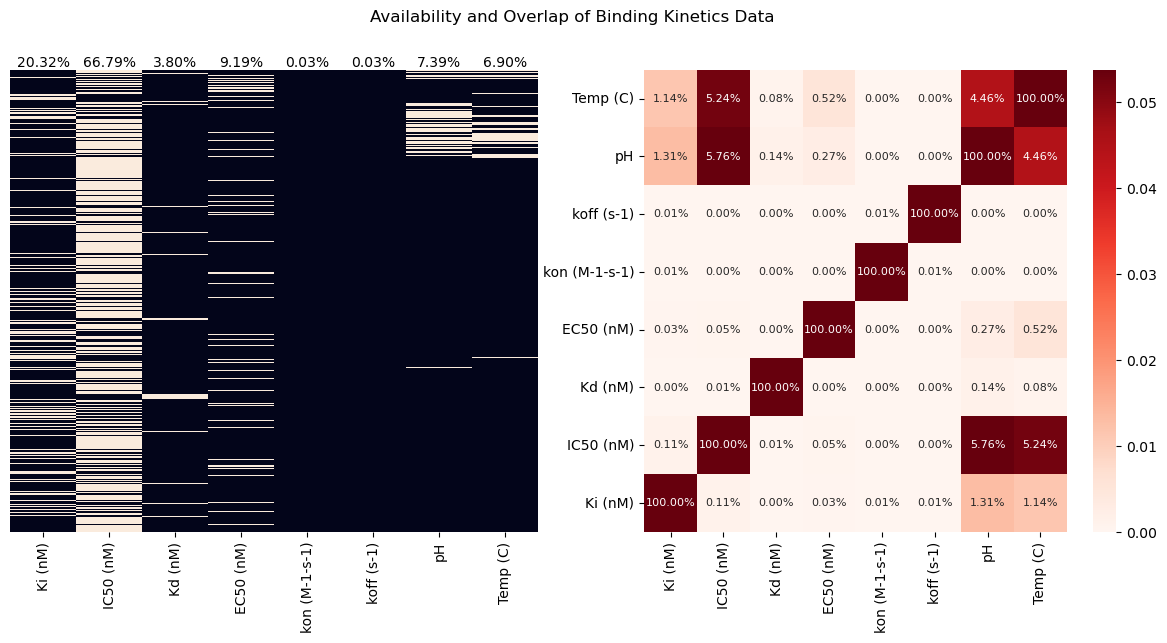

In [5]:
# availability and overlap
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plot_availability(df=df, group=binding_kinetics, ax=axs[0])
plot_overlaps(df=df, group=binding_kinetics, ax=axs[1])
plt.suptitle("Availability and Overlap of Binding Kinetics Data")
plt.show()

In [6]:
# clean binding kinetics data
df.replace(" NV,", np.nan, inplace=True)
for col in binding_kinetics:
    df[col] = df[col].astype(str).str.replace(" C", "")
    df[col] = (
        df[col].astype(str).str.replace(">", "").str.replace("<", "").astype(float)
    )

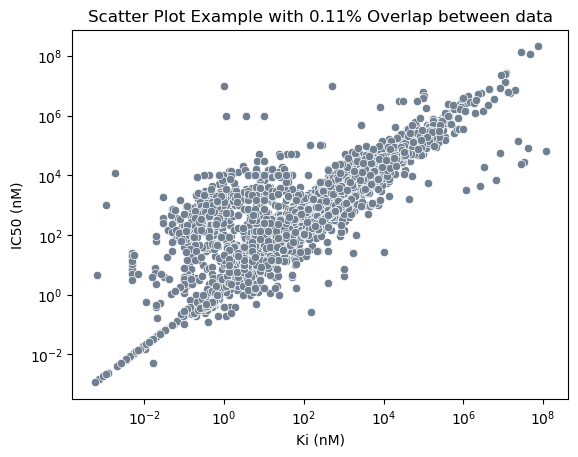

In [17]:
# scatter example discussed above
sns.scatterplot(
    df[["Ki (nM)", "IC50 (nM)"]].dropna(), x="Ki (nM)", y="IC50 (nM)", color="slategray"
)
plt.loglog()
plt.title("Scatter Plot Example with 0.11% Overlap between data")
plt.show()

As discussed above, the above scatterplot shows that a mere 0.11% of overlapping data is sufficient for statistical analyses. As a note, the relationship between both these metrics may change depending on the mechanism of action of the ligand, be it competitive, uncompetitive, non-competitive or mixed. In these cases, different variations of the Cheng-Prussof equation are valid. Interestingly, knowing these differences and metrics may allow to discriminate between the modes of action in future analyses.

Knowing the availability of data is crucial to understand what data will be of use in for in depth analyses. In particular, we do not expect kon and koff to be of much use. In addition though, it is paramount to understand the numerical distribution and scale of each data. Thus, in the following figure, we show the distribution of each binding kinetics metric, overlayed with their medians, and lower and upper quartiles. 

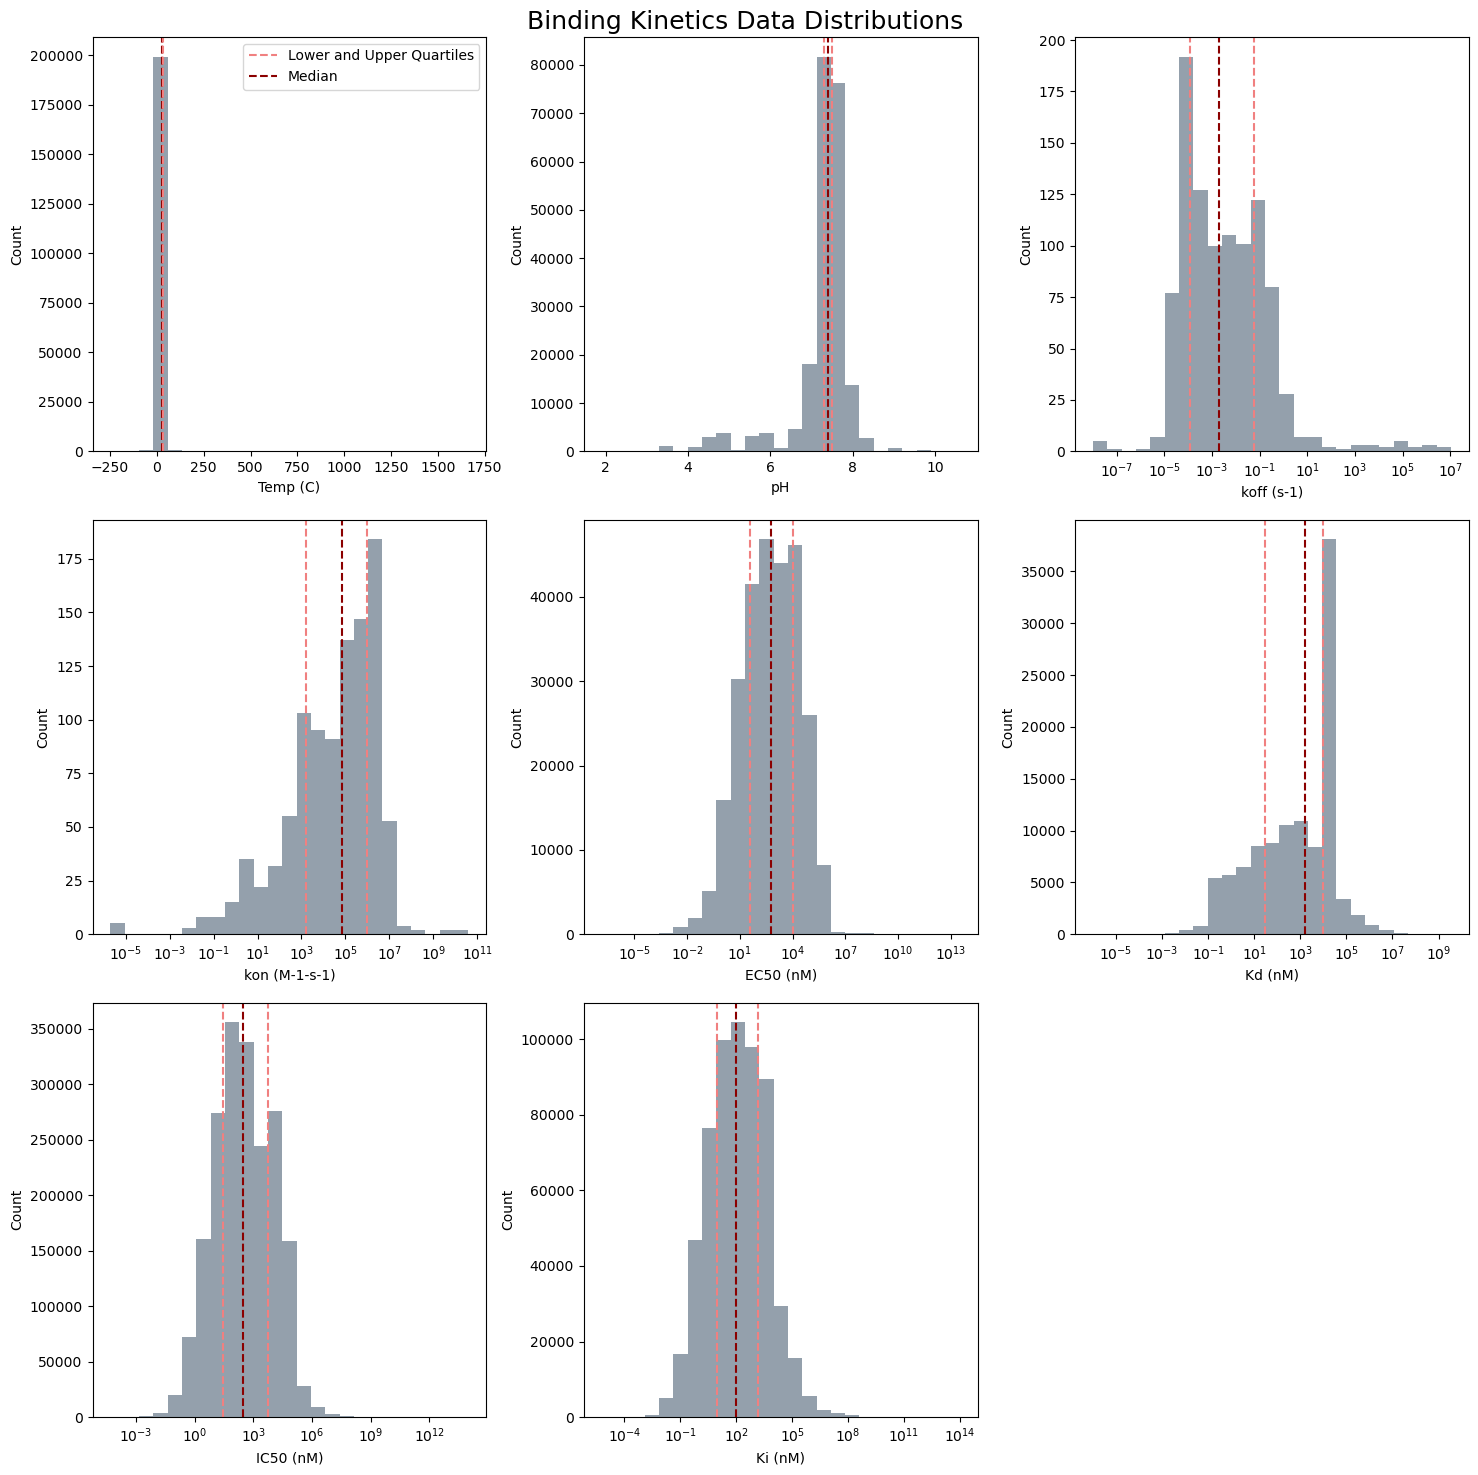

In [8]:
# data distributions
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for idx, (col, ax) in enumerate(zip(binding_kinetics, axs.flatten())):
    if idx == 0:
        show_legend = True
    else:
        show_legend = False
    if col == "pH" or col == "Temp (C)":
        logsc = (False, False)
    else:
        logsc = (True, False)
    plot_distributions(df, col, log_scale=logsc, ax=ax, show_legend=show_legend)
plt.suptitle("Binding Kinetics Data Distributions", fontsize=18)
plt.tight_layout()
axs.flatten()[8].remove()
plt.show()

The above figure show the distribution of each metric. In particular, we first appreciate that most measurements are made at physiological pH (around pH=7), and body temperature (around 37°C). Measures made outside these ranges are expected to be in extreme conditions or very different model organisms (see subsection on model organisms). In addition, we observe that all binding kinetics (aside pH and temperature) "adequatly" distributed on a log-scale. Importantly, on top of the numerical values found, this implies that any analyses involving binding kinetics shall preferentially be based on the logarithm of their values.

As a note, Kd sees a spike in counts between 10^4 and 10^5 nM. This is an artefact arising from the cleaning of the data, where many values are noted to pass a certain threshold (e.g. > 10^4). We note this artefact as it might introduce biases in results.

### Target and Ligand Related Data

In addition to binding kinetics, ligand and target information is crucial to this project, especially when describing molecular features that may lead to success in drug discovery. Thus a similar data overview is proposed as above for such data (ligand structures, target sequences, IDs for external datasets, etc.). First, we show the availability of the data.

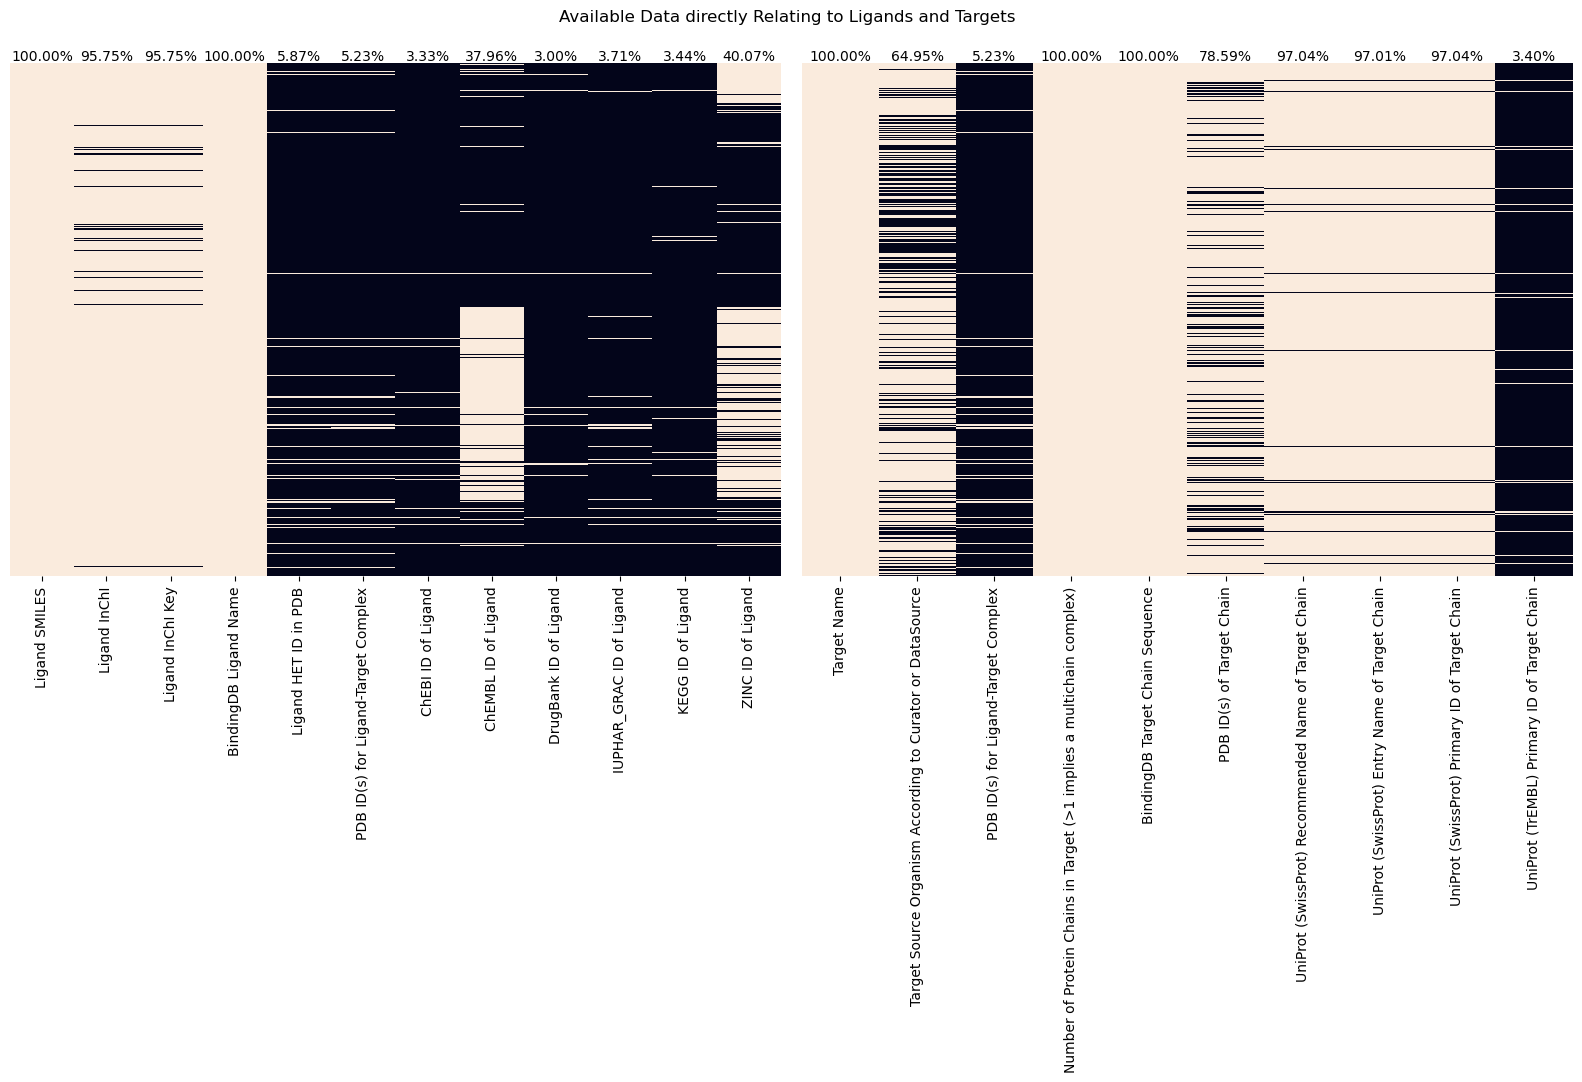

In [9]:
# availability
ligands_and_targets = list(set(ligand_related + target_related))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 11))
plot_availability(df=df, group=ligand_related, ax=axs[0])
plot_availability(df=df, group=target_related, ax=axs[1])
plt.suptitle("Available Data directly Relating to Ligands and Targets\n")
plt.tight_layout()
plt.show()

From the above plot, we appreciate that, generally, more data is available in this category than for binding kinetics. In particular, ligand structures (SMILES) is available for 100% of entries, as is the target chain sequence. This data will be of great use in subsequent analyses, especially pertaining to molecular features. 

On the contrary, the lowest availability is observed for DrugBank IDs of ligands. Rather than a faulty database, this is actually a good primary indicator of the first steps of drug discovery. Indeed, this low attribution of DrugBank IDs may simply reflect the low success rate in the initial steps of drug discovery. In general, we are satisfied with the proportion and distribution of available data shown above, in our aim of characterising molecular features, enriched with external datasets.

For completeness, we show the overlap between data pairs below. In general, a low overlap is often simply caused by the low availability of one item of the data pair. However, as these data are mostly used to access external datasets, we give less importance to the overlap than for data relating to binding kinetics.

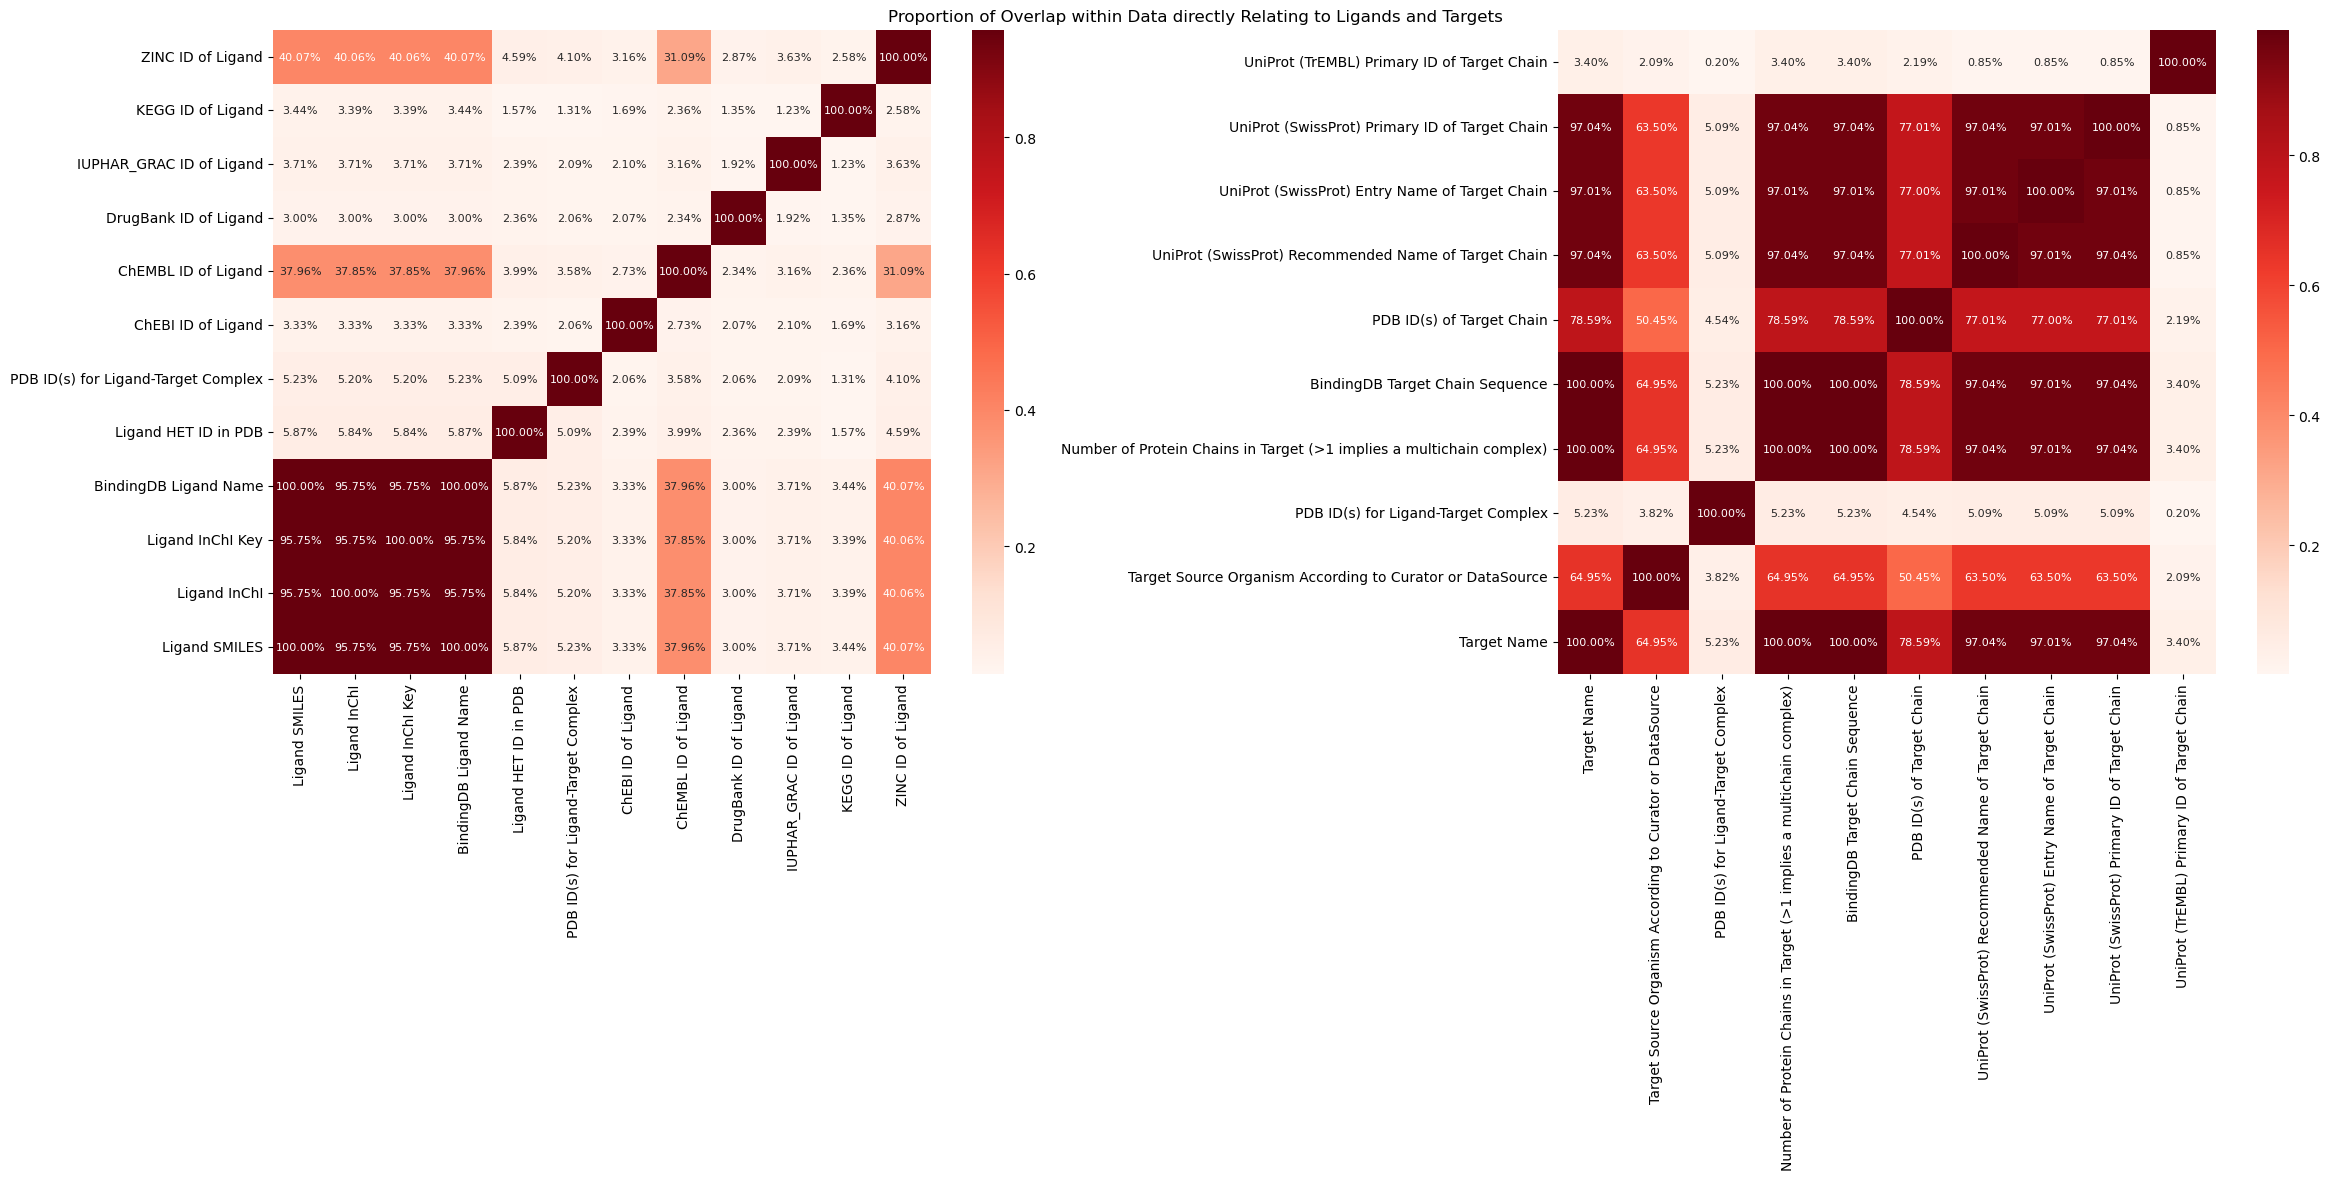

In [10]:
# overlap
fig, axs = plt.subplots(1, 2, figsize=(24, 12))
plot_overlaps(df, ligand_related, ax=axs[0])
plot_overlaps(df, target_related, ax=axs[1])
plt.suptitle(
    "Proportion of Overlap within Data directly Relating to Ligands and Targets"
)
plt.tight_layout()
plt.show()

On top of the IDs, structures and sequences presented above, we pay particular attention to the target source organisms. Indeed, although most of our analyses will be based on human target proteins, it is important to note how organisms are used in drug discovery. In our aim of identifying success factors in drug discovery, understanding the target organisms used as models is a first crucial step. It is also worthy to note that many diseases in humans are actually treated by targeting other organisms' proteins, most notably in viral or bacterial infections. Thus, we show below the distribution of target organisms.

#### Target Organisms

In [11]:
# cleaning target organism data
in_mapping = {
    "Human immunodeficiency virus": ["immunodeficiency virus", "hiv"],
    "Sars coronavirus": ["severe acute respiratory", "sars"],
    "Human herpes virus": ["herpes"],
    "Homo sapiens": ["h. sapiens"],
    "Mus musculus": ["mouse", "m. musculus"],
    "Rattus norvegicus": ["rattus", "r. norvegicus"],
    "Cavia porcellus": ["cavia"],
    "Hepatitis C": [],
    "Escherichia coli": ["coli"],
    "Caenorhabditis elegans": ["elegans"],
    "Influenza virus": ["influenza"],
    "Oryctolagus cuniculus": ["cuniculus"],
    "Streptococcus pyogenes": ["pyogenes"],
    "Plasmodium falciparum": [],
    "Saccharomyces cerevisiae": ["cervisiae"],
    "Streptococcus pneumoniae": [],
    "Mycobacterium tuberculosis": [],
}

f = lambda x: group_categories(
    str(x),
    in_mapping=in_mapping,
    check_key_for_in_mapping=True,
)

df["Target Source Organism According to Curator or DataSource"] = (
    df["Target Source Organism According to Curator or DataSource"]
    .apply(f)
    .apply(str.capitalize)
    .replace("Nan", np.nan)
)

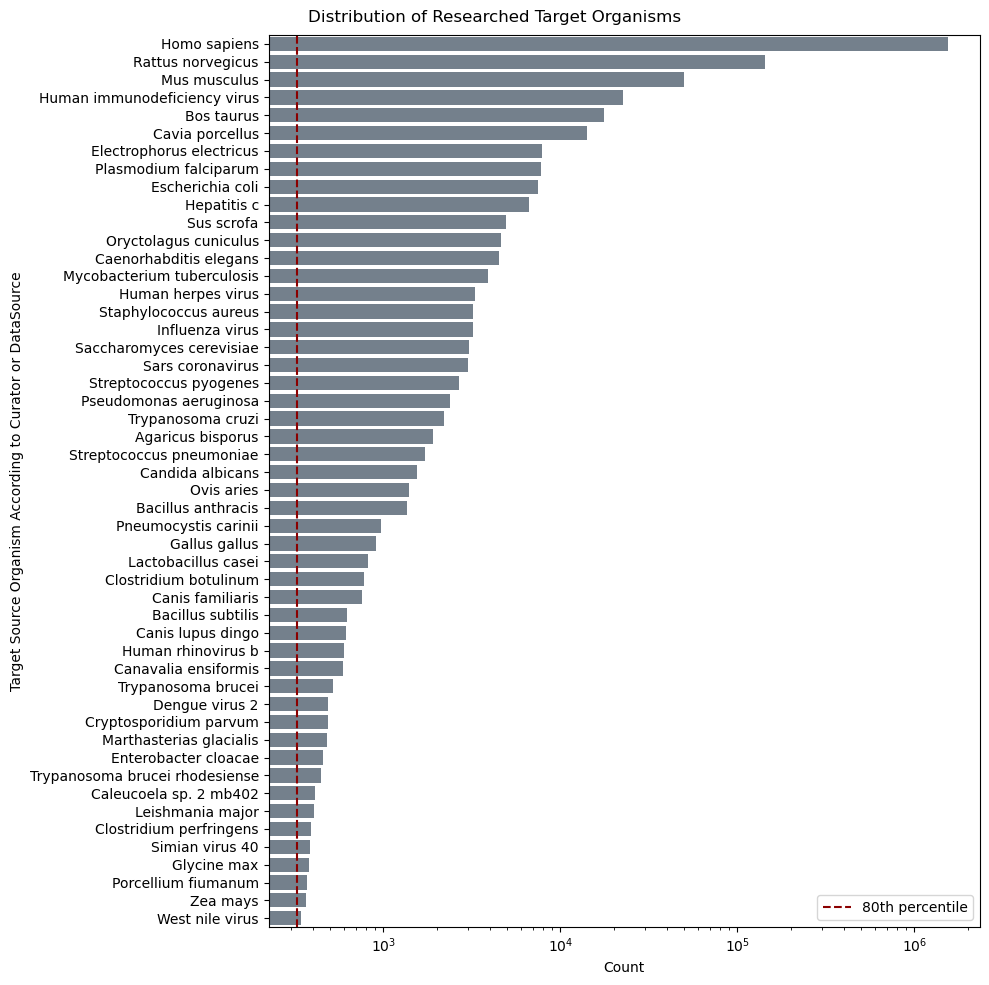

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
categorical_countplot(
    df,
    "Target Source Organism According to Curator or DataSource",
    ax=ax,
    percentile=0.8,
)
plt.suptitle("Distribution of Researched Target Organisms")
plt.tight_layout()
plt.show()

Without surprise, the above plot shows that H. sapiens is the most frequently targeted organism in research. Thereafter are the common mice and rat models. Interestingly, these three models are used to target a large array of disease classes, as will be shown in a subsequent analysis. The fourth targeted organism however, relates to a single disease: HIV/AIDS. This highlights the importance of this disease class, for which research interest was immense, following the 1980s pandemic. This is shown below in a timeseries analysis. 

As mentioned above we see many examples of such viral or bacterial infections being in the top 20% studied organisms (dashed red line represents the 80th percentile of counts in the BindingDB dataset). For example, SARS coronavirus, E.coli, Herpes virus, Hepatitis C and Influenza virus are all highly studied organisms.

As an intermediate conclusion, we therefore acknowledge that targeted organisms are either models for human diseases (such as M. musculus, R. norvegicus or C. elegans) or disease causing themselves (such as the bacteria and viruses mentioned above). For our subsequent analyses, we will therefore discriminate between these classes to avoid bias, or simply focus on particular categories.

### Metadata

A final category of data of interest is metada. Indeed, information such as atricle DOIs, patent numbers and institutions allows for a more complete overview of drug discovery. Indeed, key metrics of success are taken from the number of citations of a paper or patent. In addition, to understand the dynamics of drug discovery, the years of publications are highley useful for mapping drug discovery in time, while kowledge on institutions allows to map drug discovery in space. 

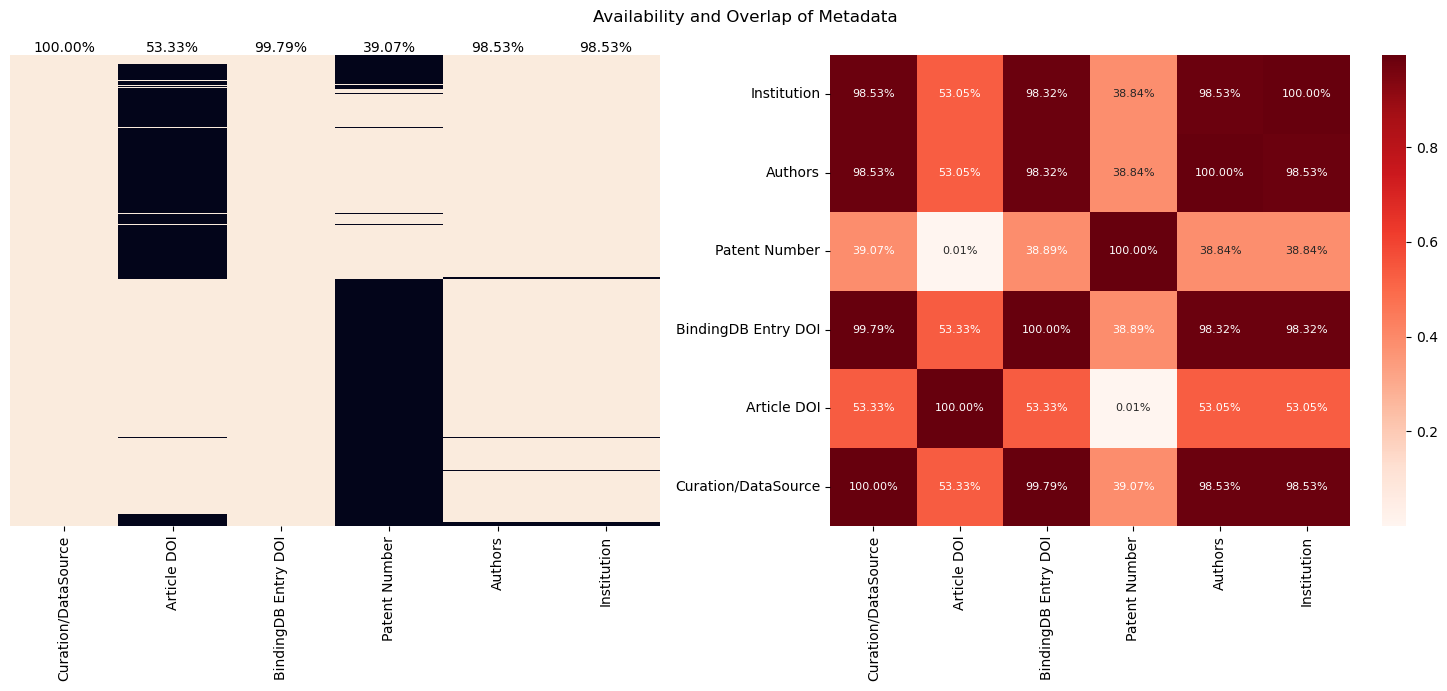

In [13]:
# availability and overlap
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
plot_availability(df=df, group=metadata, ax=axs[0])
plot_overlaps(df, metadata, ax=axs[1])
plt.suptitle("Availability and Overlap of Metadata")
plt.tight_layout()
plt.show()

The above figure shows that roughly half the entries in bindingDB are linked to a publication. Also around 40% of entries are under a patent. Interestngly, as seen on the right plot, the overlap between Article DOIs and Patent Numbers is only 0.01%. Thus, the two categories are nearly exclusive, showing that knowledge on citations of publications and patents are complementary success indicators. Secondly, as for the low amount of DrugBank IDs, the low overlap of Article DOIs and Patent Numbers show that only very few researched compounds lead to commercial benefit, demonstrating yet another hurdle in drug discovery.

To counter this very low turnover, researchers often initially resort to high-troughput screening, with the largest of the dataset covering around 12'000 compounds. This is taken into when using number of citations as a success metric. More particularly, citations are one of many indicators of success. The distributions of compounds studied per article and covered per patent are shown below.

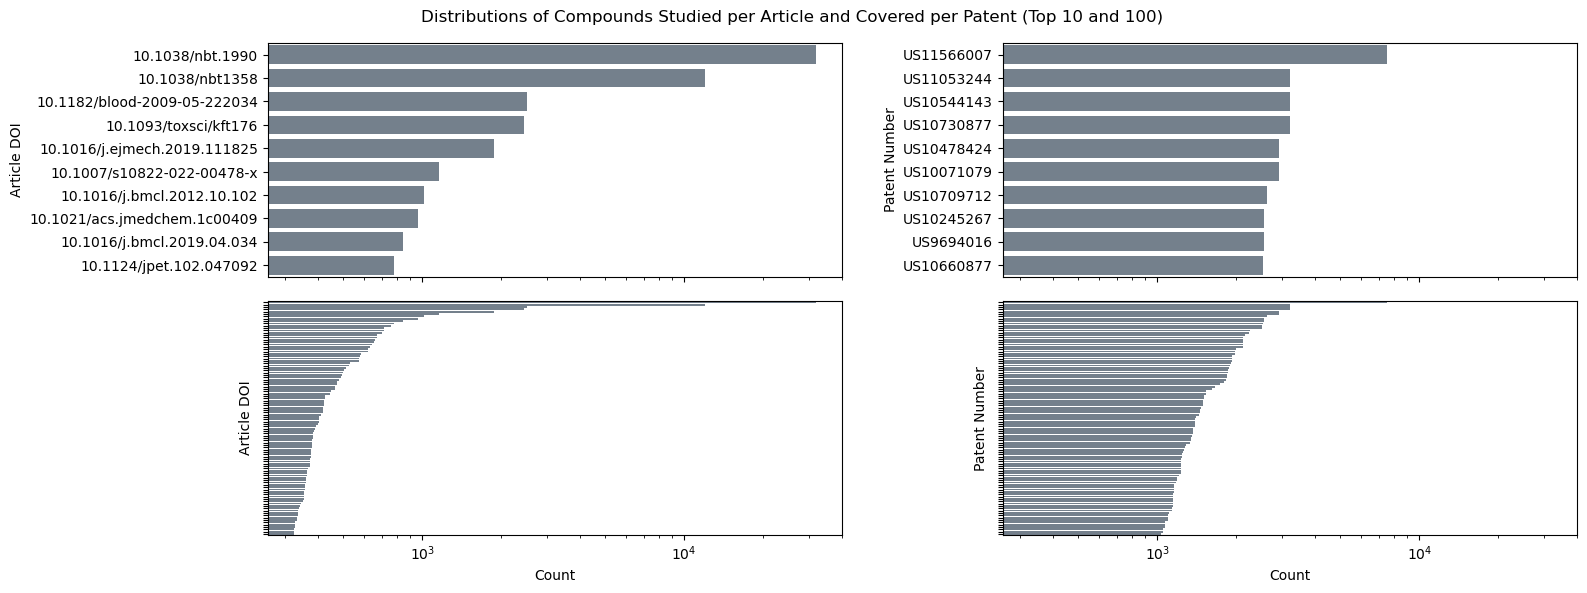

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(16, 6), sharex=True)
N1 = 100
N2 = 10
categorical_countplot(df, "Article DOI", ax=axs[1, 0], N=N1)
categorical_countplot(df, "Article DOI", ax=axs[0, 0], N=N2)
categorical_countplot(df, "Patent Number", ax=axs[1, 1], N=N1)
categorical_countplot(df, "Patent Number", ax=axs[0, 1], N=N2)
plt.suptitle(
    f"Distributions of Compounds Studied per Article and Covered per Patent (Top {N2} and {N1})"
)
plt.tight_layout()
axs[1, 0].set_yticklabels("")
axs[1, 1].set_yticklabels("")
plt.show()

As mentioned above, future analysis might rely on mapping drug discovery in space. We show here that the data is obtainable.

In [15]:
in_mapping = {
    "Pfizer": [],
    "MSD": ["Dohme"],
    "Bristol-Myers Squibb": [],
    "Amgen": [],
    "Novartis": [],
    "Janssen": [],
    "Eli Lilly": ["lilly"],
    "Roche": [],
    "Incyte": [],
    "Gilead": [],
    "Bayer": [],
    "Abbott": [],
    "Scripps Research Institute": ["scripps"],
    "The Burnham Institute": ["burnham"],
    "Genentech": [],
    "GlaxoSmithKline": ["gsk"],
    "Astrazeneca": [],
    "Abbvie": [],
    "Merck": [],
    "Boehring": [],
}

f = lambda x: group_categories(
    str(x),
    in_mapping=in_mapping,
    check_key_for_in_mapping=True,
)

df["Institution"] = (
    df["Institution"].apply(f).replace("TBA", np.nan).replace("nan", np.nan)
)  # tba = to be attributed

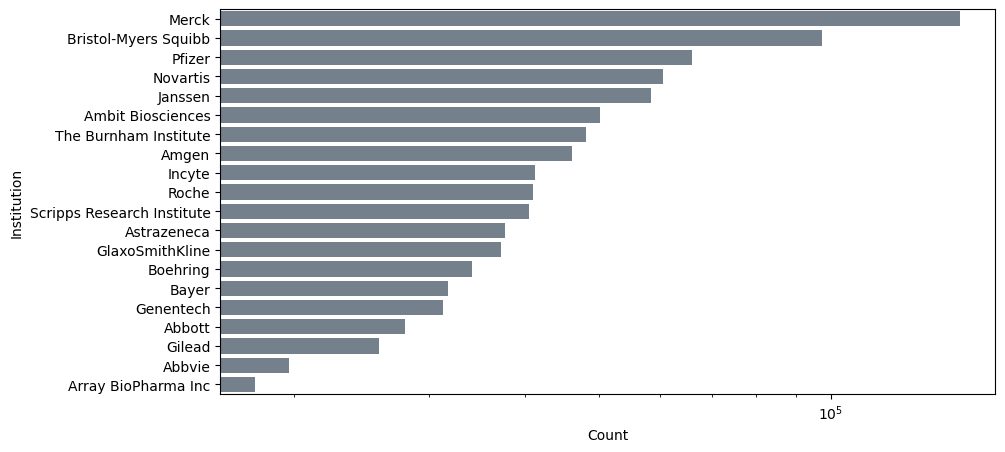

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
categorical_countplot(df, "Institution", N=20, ax=ax)
plt.show()

---

# Finding the Diseases

In [56]:
from src.scripts.disease_plotting import (
    load_uniprotid_diseases,
    quantify_missing_diseases,
    add_keywords_when_comments_missing,
    sort_diseases,
)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")

In [57]:
bindingdb_df = pd.read_csv(
    r"./data/BindingDB_All.tsv",
    sep="\t",
    usecols=["UniProt (SwissProt) Primary ID of Target Chain", "Article DOI"],
)

We now load the `src/data/UniprotID_disases.json` file which was generated using the following script in roughly 30 mins:

```py
from src.scripts.uniprot import get_uniprot_diseases
import os

get_uniprot_diseases(
    bindingdb_df["UniProt (SwissProt) Primary ID of Target Chain"].value_counts().index,
    savename=os.path.join(
        "src",
        "data",
        "UniprotID_disases.json",
    ),
)
```

The function `get_uniprot_diseases` uses an Uniprot API call to retrieve disease information. An Uniprot ID can be linked to more than one disease.

In [74]:
diseases = load_uniprotid_diseases()
ids_missing_diseases, percentage_missing = quantify_missing_diseases(diseases)
diseases_df = add_keywords_when_comments_missing(diseases)

print(
    f"Percentage of Uniprot IDs missing a disease description : {percentage_missing:.2f}%"
)
print(
    f"One random missing ID: https://www.uniprot.org/uniprotkb/{ids_missing_diseases[42]}"
)

Percentage of Uniprot IDs missing a disease description : 77.14%
One random missing ID: https://www.uniprot.org/uniprotkb/Q9Y5N1


As we can see 77.14% of Uniprot IDs are missing a description of the related diseases. If we choose a random missing ID (`Q9Y5N1`), we can see that on the Uniprot page, under the section `Disease & Variants`, there are no registered diseases.

One problem with using Uniprot's API is that sometimes the related diseases are either under the `keywords` section or the `comments` section. Since the `comments` section is more thorough, we decided to add the `keywords` to our data only if it is missing comments, using the `pandas.DataFrame.bfill` method and illustrated in the next cell.

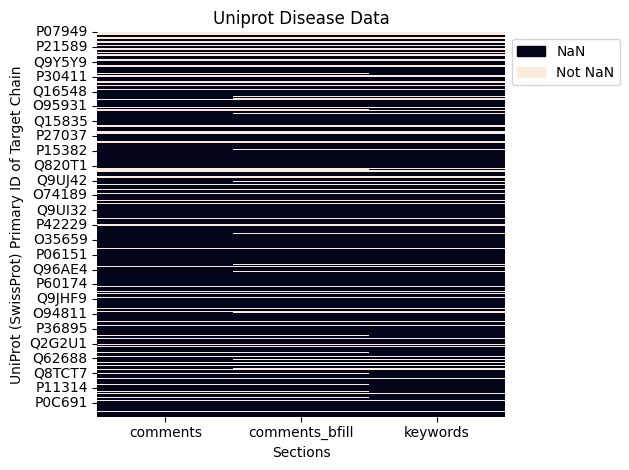

In [75]:
fig, ax = plt.subplots()

cmap = sns.color_palette("rocket", as_cmap=True)

sns.heatmap(
    diseases_df[
        [
            "UniProt (SwissProt) Primary ID of Target Chain",
            "comments",
            "comments_bfill",
            "keywords",
        ]
    ]
    .set_index("UniProt (SwissProt) Primary ID of Target Chain")
    .notna(),
    ax=ax,
    cbar=False,
    cmap=cmap,
)

isna_patch = mpatches.Patch(color=cmap.get_under(), label="NaN")
notna_patch = mpatches.Patch(color=cmap.get_over(), label="Not NaN")

ax.legend(title="", handles=[isna_patch, notna_patch])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("Sections")

ax.set_title("Uniprot Disease Data")

plt.tight_layout()
plt.show()

With this data we can now plot the frequency of studied diseases. We group the diseases into different classes using the `sort_diseases` function.

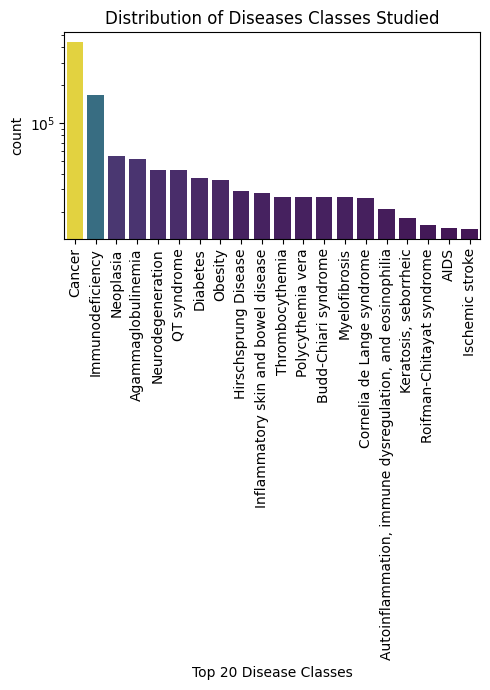

In [76]:
diseases_df = diseases_df.rename(columns={"comments_bfill": "diseases"})
diseases_df = diseases_df.dropna(subset="diseases").drop(
    columns=["comments", "keywords"]
)
diseases_df["Disease Classes"] = diseases_df["diseases"].apply(
    lambda l: [sort_diseases(l_i) for l_i in l]
)

df_intersection_disease_class_counts = (
    bindingdb_df.merge(diseases_df, how="inner")
    .explode(["Disease Classes", "diseases"])
    .value_counts(subset=["Disease Classes"])
    .reset_index()
)

fig, ax = plt.subplots(figsize=(5, 7))

sns.barplot(
    data=df_intersection_disease_class_counts,
    x="Disease Classes",
    y="count",
    order=df_intersection_disease_class_counts["Disease Classes"][:20],
    hue="count",
    legend=None,
    palette="viridis",
    ax=ax,
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Top 20 " + ax.get_xlabel())
ax.set_yscale("log")
ax.set_title("Distribution of Diseases Classes Studied")

plt.tight_layout()
plt.show()

As we can see `Cancer`, which regroups all kinds of different cancers, is the most studied disease class. `Neurodegeneration` which regroups diseases such as `Parkinson` and `Alzheimer` is 5th. The sexually transmitted disease of `AIDS` is also within the top 20. 

Now we load the `src/data/metadata.csv` file which was generated using the following script in roughly 5 hours:

```py
from src.scripts.metadata import add_extra_pub_data
import pandas as pd
df = pd.read_csv(
    r"./data/BindingDB_All.tsv",
    sep="\t",
    usecols=["Article DOI"],
)
add_extra_pub_data(df)
```

This function uses a `crossref` API call to collect information from publications.

In [77]:
doi_metadata = pd.read_csv(r"src/data/metadata.csv").dropna()
doi_metadata.describe(include="all").fillna("")

,Article DOI,journal,year,publisher
count,40719,40719,40719.0,40719
unique,40719,195,,33
top,10.1021/jm9602571,Journal of Medicinal Chemistry,,Elsevier BV
freq,1,13877,,21918
mean,,,2008.964709,
std,,,8.519787,
min,,,1965.0,
25%,,,2004.0,
50%,,,2010.0,
75%,,,2016.0,


From the `crossref` API, we collected the `journal`, the `year` and the `publisher` related to the `Article DOI`. We can see that there are 195 unique journals, and 33 different publishers. With the year, we can now correlate the frequency of diseases studied with time.

In [72]:
time_series_diseases_df = (
    bindingdb_df.dropna()
    .merge(diseases_df.dropna(), how="inner")
    .merge(doi_metadata.dropna(), how="inner")
)

time_series_diseases_df_count = (
    time_series_diseases_df.explode(["Disease Classes", "diseases"])
    .value_counts(subset=["year", "Disease Classes", "diseases"])
    .reset_index()
)
time_series_diseases_df_count["Disease Classes"] = time_series_diseases_df_count[
    "Disease Classes"
].replace(
    {
        k: "Other"
        for k in time_series_diseases_df.explode(["Disease Classes"])["Disease Classes"]
        .value_counts()
        .index[20:]
    }
)

# TODO: !!!!!!! UNCOMMENT BEFORE FINAL RELEASE
fig = px.area(
    time_series_diseases_df_count,
    x="year",
    y="count",
    color="Disease Classes",
    line_group="diseases",
)
fig.show()

If you play around with this plot you can see that `AIDS` was studied more during the 90's, peaked in 1996, and decreased ever since. On the other hand, proteins related to cancer started to become more popular around 2004, peaked in 2011 where more specifically `Hepatocellular Carcinoma` was the most studied.

If we look at the data as a whole, we can see three peaks above 60k mentions, which are in 2011, in 2016 and in 2019.

# Finding drug target class 

In [6]:
SAVE_PATH = "/Users/poseidon/Documents/ADA/ada-2024-project-standarddeviants/data/BindingDB_All.tsv"
usecols=["Target Name", 'Target Source Organism According to Curator or DataSource']
df = pd.read_csv( SAVE_PATH,sep="\t", usecols=usecols)

We first reduce the dataset to include only entries related to the Human organism, as our project focuses on human drug targets. Next, we standardize the characters to lower case in the 'Target Name' field to improve browsing and searchability.

In [15]:
df = df[df['Target Source Organism According to Curator or DataSource'].str.startswith('Human') | (df['Target Source Organism According to Curator or DataSource'] == 'Homo sapiens')]
df["Target Name"] = df["Target Name"].str.lower()
rows, columns= df.shape

Since the sources of this dataset were varied, there was no standardized nomenclature for drug target names. Thus, we found no other way but to manually create a mapping for drug target assignment.

In [9]:
# Define the mappings based on keywords and patterns
in_mapping = {
    "Growth Factor": ["growth factor", "growth"],
    
    "Enzyme" : ["ase"], 
    "Proteases - Enzyme" : ["protease", "renin","elastase", "kallikrein-5","plasminogen", "secretase", "coagulation factor x", "coagulation factor ii", "coagulation factor vi",  "coagulation factor ix", "coagulation factor xi",  "coagulation factor xii", "peptidase"],
        "Cathepsin - Protease - Enzyme": ["cathepsin"],
        "Plasmepsin - Protease - Enzyme": ["plasmepsin"],
        "Anthrax LF - Protease - Enzyme": ["anthrax lf", "lethal factor"],
    
    "Phosphodiesterase - Enzyme" : ["phosphodiesterase"],
    "Transferase - Enzyme" : ["transferase"], 
    "Oxidoreductase - Enzyme": ["reductase"], 
        "Enoyl-ACP - Oxidoreductase - Enzyme": ["enoyl-acp reductase", "enoyl-acp"],
        "P450 - Oxidoreductase - Enzyme": [ "cytochrome p450"],
        "COX-2 - Oxidoreductase - Enzyme": ["prostaglandin g/h synthase 2", "cyclooxygenase", "cox-2"],
    "Lyases - Enzyme": ["anhydrase", "dioxygenase"],
    "Hydrolases - Enzyme" : ["deacetylase", "hydrolase", "lipase"],
    "Caspases - Enzyme": ["caspase"],
    "Demythelase - Enzyme" : ["demethylase"],
    "Neuraminidase - Enzyme": ["neuraminidase"],
    "Glutaminyl Cyclase - Enzyme": ["glutaminyl cyclase", "gc"], 
    "Cholinesterase - Enzyme" : ["cholinesterase"], 
        "AChE/BuChE - cholinesterase- Enzyme": ["acetylcholinesterase", "butyrylcholinesterase", "ache", "buche"],
    "HCV Proteinase - Enzyme": ["hcv proteinase", "hepatitis c virus proteinase"],
   
    "Kinases - Enzyme": ["kinase", "interleukin-1 receptor-associated kinase 4"],
        "CDK - kinase - Enzyme": ["cdk", "cyclin-dependent kinase"],
        "Protein Kinase C - kinase - Enzyme": ["protein kinase c", "pkc"],
        "Tyrosine Kinase - kinase - Enzyme" : ["tyrosine", "src"], 
    
        "GSK 3 - kinase - Enzyme": ["gsk3", "glycogen synthase kinase"],
        "Pi3K - kinase - Enzyme": ["phosphatidylinositol 3-kinase", "pi3k"],
        "MAPK - kinase - Enzyme": ["mitogen-activated protein kinase", "mapk", "p38", "mapk1", "mapk14", "mapk8", "mapk10", "mapk9", "mapk2", "map kinase-interacting protein"],
        "Serine/Threonine - kinase - Enzyme": ["serine/threonine-protein kinase", "serine kinase", "threonine kinase", "mtor", "pim-2", "pim-3", "atr", "b-raf", "raf proto-oncogene", "plk1", "pim"],
    
    
    
    "Ion Channels": ["channel", "voltage-gated", "p2x", "ionotropic"],
   
    "Nuclear Hormone Receptor" : ["peroxisome proliferator-activated receptor gamma", "androgen receptor", "bile acid receptor"],
    
    "Transporter" : ["transporter"],
    
    "General GPCR": ["gpcr", "prostaglandin e2 receptor ep4 subtype", "g protein-coupled receptor", "metabotropic", "melanin-concentrating hormone", "sigma non-opioid intracellular receptor", "substance-p receptor"],
        "Adrenergic Receptor - GPCR": ["adrenergic", "alpha-adrenergic", "beta-adrenergic"],
        "Dopamine Receptor - GPCR": ["dopamine receptor", "d1", "d2", "d3", "d4", "d5"],
        "Serotonin Receptor - GPCR": ["serotonin receptor", "5-ht", "5-hydroxytryptamine", "5-ht1a", "5-ht2a", "5-ht3", "5-ht4", "5-ht5"],
        "Histamine Receptor - GPCR": ["histamine receptor", "h1", "h2", "h3", "h4"],
        "Muscarinic Acetylcholine Receptor - GPCR": ["muscarinic acetylcholine receptor", "machr", "m1", "m2", "m3", "m4", "m5"],
        "Opioid Receptor - GPCR": ["opioid receptor", "mu", "delta", "kappa", "oprm1", "oprd1", "oprk1", "nociceptin"],
        "Cannabinoid Receptor - GPCR": ["cannabinoid receptor", "cb1", "cb2"],
        "Purinoceptor - GPCR": [ "p2y", "adenosine receptor"],
        "Chemokine Receptor - GPCR": ["chemokine receptor", "ccr", "cxcr", "ccr5", "cxcr4", "ckr"],
        "Sphingosine-1-Phosphate Receptor - GPCR": ["sphingosine", "s1p"],
        "Melanocortin Receptor - GPCR": ["melanocortin receptor", "mc1r", "mc2r", "mc3r", "mc4r", "mc5r"],
        "Endothelin Receptor - GPCR": ["endothelin receptor", "et-a", "et-b", "eta", "etb"],
        "Orexin Receptor - GPCR": ["orexin receptor", "hypocretin receptor"],
        "Apelin Receptor - GPCR": ["apelin"],  
}

priority_list_3 = [
    "Cathepsin - Protease - Enzyme", "Plasmepsin - Protease - Enzyme", "Anthrax LF - Protease - Enzyme",
    "Enoyl-ACP - Oxidoreductase - Enzyme", "P450 - Oxidoreductase - Enzyme", "COX-2 - Oxidoreductase - Enzyme", 
    "AChE/BuChE - cholinesterase- Enzyme",
    "CDK - kinase - Enzyme","Protein Kinase C - kinase - Enzyme","Tyrosine Kinase - kinase - Enzyme","GSK 3 - kinase - Enzyme",
    "Pi3K - kinase - Enzyme","MAPK - kinase - Enzyme","Serine/Threonine - kinase - Enzyme",

    "Proteases - Enzyme","Oxidoreductase - Enzyme","Lyases - Enzyme","Hydrolases - Enzyme" ,"Caspases - Enzyme","Demythelase - Enzyme",
    "Neuraminidase - Enzyme","Glutaminyl Cyclase - Enzyme","Cholinesterase - Enzyme","HCV Proteinase - Enzyme","Kinases - Enzyme",
    "Phosphodiesterase - Enzyme", "Transferase - Enzyme",
    
    "Adrenergic Receptor - GPCR", "Dopamine Receptor - GPCR","Serotonin Receptor - GPCR","Histamine Receptor - GPCR",
    "Muscarinic Acetylcholine Receptor - GPCR","Opioid Receptor - GPCR","Cannabinoid Receptor - GPCR","Purinoceptor - GPCR",
    "Chemokine Receptor - GPCR","Sphingosine-1-Phosphate Receptor - GPCR","Melanocortin Receptor - GPCR",
    "Endothelin Receptor - GPCR","Orexin Receptor - GPCR","Apelin Receptor - GPCR", 
    
    "Nuclear Hormone Receptor", "Growth Factor","Enzyme", "Transporter", "Ion Channels", "General GPCR",]


priority_list_2 = [
    "Proteases - Enzyme","Oxidoreductase - Enzyme","Lyases - Enzyme","Hydrolases - Enzyme" ,"Caspases - Enzyme","Demythelase - Enzyme",
    "Neuraminidase - Enzyme","Glutaminyl Cyclase - Enzyme","Cholinesterase - Enzyme","HCV Proteinase - Enzyme","Kinases - Enzyme",
    "Phosphodiesterase - Enzyme", "Transferase - Enzyme",
    
    "Adrenergic Receptor - GPCR", "Dopamine Receptor - GPCR","Serotonin Receptor - GPCR","Histamine Receptor - GPCR",
    "Muscarinic Acetylcholine Receptor - GPCR","Opioid Receptor - GPCR","Cannabinoid Receptor - GPCR","Purinoceptor - GPCR",
    "Chemokine Receptor - GPCR","Sphingosine-1-Phosphate Receptor - GPCR","Melanocortin Receptor - GPCR",
    "Endothelin Receptor - GPCR","Orexin Receptor - GPCR","Apelin Receptor - GPCR", 
    
    "Nuclear Hormone Receptor", "Growth Factor","Enzyme", "Transporter", "Ion Channels", "General GPCR",]

priority_list_1 = [
    "Nuclear Hormone Receptor", "Growth Factor","Enzyme", "Transporter", "Ion Channels", "General GPCR",]

In [17]:
# Function to map Target Name to Target Class
df["Target Class"] = df["Target Name"].apply(lambda x: group_categories(
    x,
    in_mapping=in_mapping_t,
    check_key_for_in_mapping=True,
    priority_list=priority_list_3,
))

In [19]:
print('Percentage of classifed rows :', count_classified_rows(df)*100/rows, '%')  

Percentage of classifed rows : 88.68620769155457 %


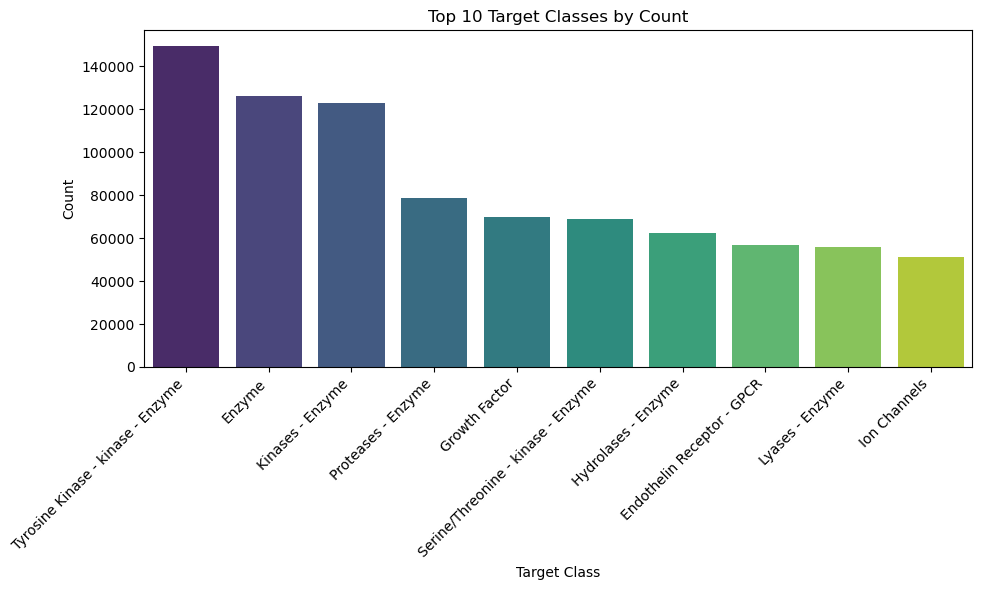

In [27]:
target_class_counts = df["Target Class"].value_counts().head(10)
# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the barplot
sns.barplot(x=target_class_counts.index, y=target_class_counts.values, palette="viridis", hue=target_class_counts.index, dodge=False, legend=False)


plt.xlabel("Target Class")
plt.ylabel("Count")
plt.title("Top 10 Target Classes by Count")
plt.subplots_adjust(right=0.8)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


As we can see Enzymes is the most studied target class